# Wrangling data

In [1]:
from astropy.io import ascii as ascii_table
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# IRSA table

## My way

In [3]:
df = ascii_table.read('irsa_catalog_WISE_iPTF14jg_search_results.tbl').to_pandas()
df.head()

/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: TableReplaceWarning: converted column 'allwise_cntr' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: TableReplaceWarning: converted column 'tmass_key' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,...,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
0,40.125566,60.879306,0.0947,0.0936,-0.0337,13.251,0.038,28.8,0.8767,12.735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028668,242.330013
1,40.125574,60.879297,0.0925,0.0874,-0.0397,13.241,0.036,30.0,1.2610,12.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048011,192.659014
2,40.125623,60.879318,0.0808,0.0794,0.0098,12.753,0.039,27.8,0.7640,11.901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079498,69.867298
3,40.125553,60.879286,0.0663,0.0608,-0.0156,12.774,0.028,38.6,1.3610,11.935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097389,209.287467
4,40.125572,60.879280,0.0645,0.0599,-0.0223,12.840,0.028,38.7,1.5550,11.897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107707,187.006050


In [5]:
df.dropna(axis='columns').head()

,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,...,w2snr,w2rchi2,nb,na,cc_flags,ph_qual,qual_frame,mjd,dist,angle
0,40.125566,60.879306,0.0947,0.0936,-0.0337,13.251,0.038,28.8,0.8767,12.735,...,18.6,0.7135,1,0,0000,AA,10,57621.235014,0.028668,242.330013
1,40.125574,60.879297,0.0925,0.0874,-0.0397,13.241,0.036,30.0,1.2610,12.629,...,21.2,1.1210,1,0,0000,AA,5,57621.628106,0.048011,192.659014
2,40.125623,60.879318,0.0808,0.0794,0.0098,12.753,0.039,27.8,0.7640,11.901,...,32.0,1.0590,1,0,0000,AA,10,57063.798302,0.079498,69.867298
3,40.125553,60.879286,0.0663,0.0608,-0.0156,12.774,0.028,38.6,1.3610,11.935,...,29.3,0.7133,1,0,0000,AA,10,57256.774856,0.097389,209.287467
4,40.125572,60.879280,0.0645,0.0599,-0.0223,12.840,0.028,38.7,1.5550,11.897,...,35.1,1.0450,1,0,0000,AA,5,57257.102751,0.107707,187.006050


## Pandas only approach

In [25]:
fname = 'irsa_catalog_WISE_iPTF14jg_search_results.tbl'

# get column names and only keep non-blank ones
with open(fname) as f:
    columns = [w.strip() for w in f.readlines()[89].split('|') if w.strip()]
    
df2 = pd.read_csv(fname, comment='\\', skiprows=93, delim_whitespace=True, names=columns)
df2.head()

,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,...,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
0,40.125566,60.879306,0.0947,0.0936,-0.0337,13.251,0.038,28.8,0.8767,12.735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028668,242.330013
1,40.125574,60.879297,0.0925,0.0874,-0.0397,13.241,0.036,30.0,1.2610,12.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048011,192.659014
2,40.125623,60.879318,0.0808,0.0794,0.0098,12.753,0.039,27.8,0.7640,11.901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079498,69.867298
3,40.125553,60.879286,0.0663,0.0608,-0.0156,12.774,0.028,38.6,1.3610,11.935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097389,209.287467
4,40.125572,60.879280,0.0645,0.0599,-0.0223,12.840,0.028,38.7,1.5550,11.897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107707,187.006050


# Miller+11 table

In [64]:
fname = 'Miller_et_al2011_table4.txt'

df_M11 = pd.read_csv(fname, sep='\t', header=1, skiprows=1, skipfooter=2, engine='python', index_col='t_mid^a')
df_M11.drop('(MJD)', inplace=True)
df_M11.dropna(axis='columns', inplace=True)
df_M11

,J mag,H mag,K_s mag
t_mid^a,,,
55466.137,10.04 +or- 0.03,9.14 +or- 0.03,8.65 +or- 0.03
55468.145,9.99 +or- 0.03,9.06 +or- 0.04,8.64 +or- 0.04
55469.148,10.04 +or- 0.03,9.07 +or- 0.03,8.70 +or- 0.03
55479.109,10.11 +or- 0.03,9.11 +or- 0.03,8.63 +or- 0.04
55504.164,10.20 +or- 0.03,9.24 +or- 0.03,8.74 +or- 0.03
55513.195,10.29 +or- 0.03,9.34 +or- 0.03,8.79 +or- 0.03
55518.168,10.32 +or- 0.03,9.34 +or- 0.04,8.84 +or- 0.03
55527.117,10.35 +or- 0.03,9.40 +or- 0.03,8.89 +or- 0.03
55531.145,10.40 +or- 0.03,9.44 +or- 0.03,8.97 +or- 0.03


Okay this is annoying. let's cheat

In [82]:
fname = 'Miller+11-tbl4_altered.txt'
df_M11 = pd.read_csv(fname, delim_whitespace=True, index_col=0)
df_M11

,Jmag,Jmag_err,Hmag,Hmag_err,K_smag,K_smag_err
t_mid^a,,,,,,
55466.137,10.04,0.03,9.14,0.03,8.65,0.03
55468.145,9.99,0.03,9.06,0.04,8.64,0.04
55469.148,10.04,0.03,9.07,0.03,8.70,0.03
55479.109,10.11,0.03,9.11,0.03,8.63,0.04
55504.164,10.20,0.03,9.24,0.03,8.74,0.03
55513.195,10.29,0.03,9.34,0.03,8.79,0.03
55518.168,10.32,0.03,9.34,0.04,8.84,0.03
55527.117,10.35,0.03,9.40,0.03,8.89,0.03
55531.145,10.40,0.03,9.44,0.03,8.97,0.03


# Foley+09 table

In [91]:
fname = 'Foley+09-table2.txt'

df_F09 = pd.read_csv(fname, delim_whitespace=True, index_col=0, skipfooter=1, engine='python')

for col in df_F09.columns:
    if col.endswith('_err'):
        df_F09[col] *= 1e-3
df_F09

,B,B_err,V,V_err,R,V_err.1,I,I_err,Unfiltered,Unfiltered_err,Telescope
JD,,,,,,,,,,,
2454764.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0195,KAIT
2454778.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.069,0.0920,KAIT
2454781.76,18.340,0.084,17.828,0.037,NaN,NaN,NaN,NaN,NaN,NaN,KAIT
2454783.74,18.229,0.062,17.718,0.042,17.509,41.0,17.377,0.054,NaN,NaN,KAIT
2454784.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.736,0.0910,KAIT
2454784.71,18.230,0.030,17.635,0.030,17.570,30.0,17.392,0.030,NaN,NaN,Nickel
2454785.67,18.385,0.030,17.660,0.027,17.610,23.0,17.425,0.034,17.683,0.0380,KAIT
2454786.80,18.415,0.030,17.710,0.030,17.544,30.0,17.358,0.030,NaN,NaN,Nickel
2454787.67,18.596,0.030,17.762,0.030,17.552,30.0,17.376,0.030,NaN,NaN,KAIT


# Titanic data set

In [2]:
from sklearn.neighbors import KNeighborsClassifier


In [3]:
fname = 'titanic_kaggle_training_set.csv'

titanic_df = pd.read_csv(fname, index_col=0, comment='#')

feat_list = list(titanic_df.columns)
label = 'Survived'
feat_list.remove(label)
X = titanic_df[feat_list]
y = titanic_df[label]

In [4]:
X.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
228,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.250,NaN,S
244,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.125,NaN,S
451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.750,NaN,S
281,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.750,NaN,Q
293,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.875,D,C


In [5]:
y.sample(15)

PassengerId
876    1
270    1
395    1
487    1
600    1
549    0
632    0
529    0
208    1
765    0
124    1
682    1
840    1
156    0
120    0
Name: Survived, dtype: int64

## Keep only numerical parameters for now

In [6]:
feat_list = ['Pclass', 'SibSp', 'Parch', 'Fare'] # age is removed for now
X = titanic_df[feat_list]

## Simple 10-fold crossval

In [7]:
from sklearn.model_selection import KFold, cross_val_score

In [8]:
kfold = KFold(n_splits=10, random_state=1234)

knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [9]:
print(f'{np.mean(cross_val_score(knn_clf, X, y, cv=10)):.3f}')

0.685


## Include sex/gender

In [10]:
titanic_df['gender'] = titanic_df['Sex'].map(lambda x: 1 if x == 'male' else 2)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
feat_list = ['Pclass', 'SibSp', 'Parch', 'Fare', 'gender'] 
X = titanic_df[feat_list]
X.sample(5)

,Pclass,SibSp,Parch,Fare,gender
PassengerId,,,,,
14,3,1,5,31.2750,1
3,3,0,0,7.9250,2
797,1,0,0,25.9292,2
480,3,0,1,12.2875,2
256,3,0,2,15.2458,2


In [12]:
cv_results = cross_val_score(knn_clf, X, y, cv=10)

print('The accuracy when including gender = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy when including gender = 77.28%


## Normalize inputs

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

knn_clf = KNeighborsClassifier(n_neighbors=7)

cv_results = cross_val_score(knn_clf, Xminmax, y, cv=10)

print('The accuracy when scaling features = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy when scaling features = 80.43%


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Include embarking origin 

In [14]:
origin_dict = dict(C=0, S=1, Q=2)
titanic_df['porigin'] = titanic_df.Embarked.map(origin_dict).astype(int)
titanic_df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,porigin
PassengerId,,,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,1
199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,2,2
208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,1,0
242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,2,2
749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S,1,1


Right -- this isn't a good way to do this. Let's instead **one hot encode** it

In [15]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
def create_bin_cat_feats(feature_array):
    categories = np.unique(feature_array)
    feat_dict = {}
    for cat in categories:
        feat_dict[cat] = np.array(feature_array == cat).astype(int)
    return feat_dict

In [17]:
gender_dict = create_bin_cat_feats(titanic_df.Sex)
porigin_dict = create_bin_cat_feats(titanic_df.Embarked)

for feat in gender_dict.keys():
    titanic_df[feat] = gender_dict[feat]
    
for feat in porigin_dict.keys():
    titanic_df[feat] = porigin_dict[feat]

In [18]:
titanic_df[['female', 'male', 'C', 'Q', 'S']].head(5)

,female,male,C,Q,S
PassengerId,,,,,
1,0,1,0,0,1
2,1,0,1,0,0
3,1,0,0,0,1
4,1,0,0,0,1
5,0,1,0,0,1


## Rerun

In [19]:
feat_list = ['Pclass', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S'] 

X = titanic_df[feat_list]

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score(knn_clf, Xminmax, y, cv=10)

print('The accuracy with categorical features = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy with categorical features = 80.09%


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
titanic_df['age_impute'] = np.where(titanic_df.Age.notnull(), titanic_df.Age, -999).astype(int)
titanic_df['age_impute']

X = titanic_df[feat_list]

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score(knn_clf, Xminmax, y, cv=10)

print('The accuracy with -999 for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy with -999 for missing ages = 80.09%


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
titanic_df['age_impute'] = np.where(titanic_df.Age.notnull(), titanic_df.Age, titanic_df.Age.mean()).astype(int)
titanic_df['age_impute']

X = titanic_df[feat_list]

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score(KNeighborsClassifier(n_neighbors=7), Xminmax, y, cv=10)

print('The accuracy with the mean for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy with the mean for missing ages = 80.09%


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

has_ages = np.where(np.isfinite(titanic_df['Age']))[0]

impute_X_train = X.iloc[has_ages]
impute_y_train = titanic_df.Age.iloc[has_ages]

scaler = MinMaxScaler()
scaler.fit(impute_X_train)
Xminmax = scaler.transform(impute_X_train)

lr_age = LinearRegression().fit(impute_X_train, impute_y_train)

cv_results = cross_val_score(LinearRegression(), Xminmax, impute_y_train, cv=10, scoring='neg_mean_squared_error')

print('Missing ages have RMSE = {:.2f}'.format(np.mean((-1*cv_results)**0.5)))

Missing ages have RMSE = 12.77


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Use linear regression to predict the ages

In [41]:
missing_ages = np.where(np.isnan(titanic_df['Age']))[0]

impute_X_missing = X.iloc[missing_ages]

X_missing_minmax = scaler.transform(impute_X_missing)

age_preds = lr_age.predict(X_missing_minmax)

Make predictions

In [46]:
age_impute = titanic_df['Age'].copy().values
age_impute[missing_ages] = age_preds

titanic_df['age_impute'] = age_impute

X = titanic_df[['Pclass', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S', 'age_impute']]

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score(knn_clf, Xminmax, y, cv=10)

print('The accuracy with the mean for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy with the mean for missing ages = 79.53%


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Astro machine learning

In [57]:
sdss = pd.read_csv('DSFP_SDSS_spec_train.csv', index_col=0)
sdss.sample(5)

,z,type,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,...,extinction_i,extinction_z,w1mpro,w1snr,w2mpro,w2snr,w3mpro,w3snr,w4mpro,w4snr
specObjID,,,,,,,,,,,,,,,,,,,,,
318784457748277248,0.963165,ext,19.39859,19.10735,18.86824,18.98663,18.86039,19.37802,19.06753,18.83474,...,0.037230,0.027692,14.457,30.7,13.243,30.4,10.691,11.3,8.385,1.6
299603751306553344,0.037979,ext,19.96273,18.56007,17.72300,17.36289,16.91484,18.71960,17.22156,16.41532,...,0.187749,0.139651,12.964,43.4,12.797,37.2,8.952,35.5,6.973,12.3
302948465325926400,0.068384,ext,20.00524,18.89564,18.47044,18.22845,17.89595,18.55149,17.43453,17.02440,...,0.079349,0.059021,14.209,36.2,13.898,25.7,10.041,23.1,7.876,7.4
331056387373164544,0.081495,ext,20.66747,19.70902,19.21954,18.96002,18.70013,18.56008,17.53408,17.05788,...,0.038173,0.028394,14.672,32.9,14.510,17.0,10.751,12.4,8.682,3.3
324282571347224576,0.157572,ext,20.92970,19.82954,19.01587,18.66476,18.34838,19.18724,17.69324,17.00496,...,0.051599,0.038380,14.392,33.0,13.945,21.4,10.401,12.4,8.411,1.3


In [58]:
print(sdss.dtypes)

z               float64
type             object
psfMag_u        float64
psfMag_g        float64
psfMag_r        float64
psfMag_i        float64
psfMag_z        float64
modelMag_u      float64
modelMag_g      float64
modelMag_r      float64
modelMag_i      float64
modelMag_z      float64
extinction_u    float64
extinction_g    float64
extinction_r    float64
extinction_i    float64
extinction_z    float64
w1mpro          float64
w1snr           float64
w2mpro          float64
w2snr           float64
w3mpro          float64
w3snr           float64
w4mpro          float64
w4snr           float64
dtype: object


`type` is a categorical variable, so lets OHE it

In [60]:
type_dict = create_bin_cat_feats(sdss.type)

for feat in type_dict.keys():
    sdss[feat] = type_dict[feat]
    
sdss.drop('type', axis='columns', inplace=True)

In [61]:
sdss.sample(5)

,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,w1mpro,w1snr,w2mpro,w2snr,w3mpro,w3snr,w4mpro,w4snr,ext,ps
specObjID,,,,,,,,,,,,,,,,,,,,,
340189750587582464,0.106774,21.50772,20.48352,19.73435,19.42698,18.91374,19.72819,18.24166,17.52929,17.15066,...,14.945,33.5,14.721,17.9,11.596,7.8,8.995,1.4,1,0
309648344949483520,0.094131,21.37770,20.18364,19.76593,19.54000,19.01102,18.90327,17.57619,17.08146,16.75505,...,15.077,24.3,14.710,13.1,11.584,5.2,8.781,0.3,1,0
349187602785527808,0.142406,22.10549,20.20464,19.18101,18.71641,18.33806,20.85133,18.82930,17.79234,17.32209,...,14.453,36.7,14.167,24.4,12.209,4.4,8.951,1.3,1,0
299518264277493760,0.035809,19.75275,18.62902,18.04877,17.63994,17.36659,17.80526,16.60975,16.01056,15.66046,...,13.255,31.6,13.120,26.9,9.131,26.7,7.221,6.6,1,0
310852310165121024,0.096391,21.37891,19.87748,18.92281,18.41748,18.03200,18.24421,16.78687,15.97619,15.54994,...,13.686,39.1,13.241,32.3,9.796,23.3,7.241,10.6,1,0


In [70]:
sdss.describe()

,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,w1mpro,w1snr,w2mpro,w2snr,w3mpro,w3snr,w4mpro,w4snr,ext,ps
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,0.220800,4.259782,2.731910,5.895677,5.087787,2.755527,3.116936,1.486242,4.619185,3.798706,...,14.401300,32.896792,14.141649,22.105830,11.597152,7.580670,8.688453,2.10423,0.817700,0.182300
std,0.431745,410.363155,410.299672,358.180317,363.711543,390.241894,410.316838,410.248827,358.134972,363.665048,...,0.909218,8.769681,0.887858,9.877276,1.043736,9.750648,0.615946,4.16230,0.386095,0.386095
min,-0.010875,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,8.928000,1.200000,8.748000,-1.800000,3.887000,-4.300000,0.323000,-4.10000,0.000000,0.000000
25%,0.064140,20.352765,18.956615,18.172400,17.770250,17.431217,19.001040,17.601823,16.839472,16.436525,...,13.891000,28.600000,13.636000,15.600000,10.861000,1.100000,8.458000,0.00000,1.000000,0.000000
50%,0.104359,21.115620,19.532485,18.727705,18.320390,17.971355,19.699120,18.214860,17.407060,16.990480,...,14.343000,34.600000,14.083000,21.900000,11.901000,3.900000,8.812000,1.10000,1.000000,0.000000
75%,0.170732,21.752438,20.112227,19.305112,18.928160,18.624913,20.527158,18.798700,17.846430,17.444942,...,14.826000,39.100000,14.553000,28.300000,12.430000,10.900000,9.066000,2.80000,1.000000,0.000000
max,6.839257,26.790230,26.444350,25.294570,24.948680,23.473900,28.238530,28.396760,26.278250,25.727780,...,18.438000,65.200000,17.727000,58.300000,14.072000,80.400000,10.441000,90.30000,1.000000,1.000000


In [72]:
for wsnr in ['w1snr', 'w2snr', 'w3snr', 'w4snr']:
    frac_missing = sum(sdss[wsnr] < 2) / len(sdss)
    print('{:.2f}% of the obs in {} are non-detections'.format(100*frac_missing, wsnr[0:2]))

0.01% of the obs in w1 are non-detections
1.11% of the obs in w2 are non-detections
34.22% of the obs in w3 are non-detections
64.98% of the obs in w4 are non-detections


In [73]:
for filt in ['w1', 'w2', 'w3', 'w4']:
    det = np.ones(len(sdss)).astype(int)
    det[np.where(sdss['{}snr'.format(filt)] < 2)] = 0
    sdss['{}det'.format(filt)] = det
    mag = sdss['{}mpro'.format(filt)].values
    mag[det == 0] = -9.99
    sdss['{}mag'.format(filt)] = mag

## Run a $k$-NN

In [77]:
features = [col for col in sdss.columns if col != 'z']
target = 'z'

X = sdss[features]
y = sdss[target]

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [79]:
knn_reg = KNeighborsRegressor(n_neighbors=7)
y_preds = cross_val_predict(knn_reg, X, y, cv=10)
print('The RMSE = {:.3f}'.format(np.sqrt(mean_squared_error(y,y_preds))))

The RMSE = 0.241


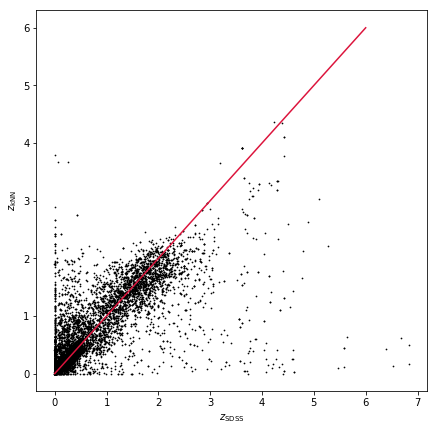

In [84]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y, y_preds, c='k', s=0.5)
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlabel(r'$z_{\rm SDSS}$')
ax.set_ylabel(r'$z_{\rm kNN}$');

## Evaluating photo-z estimation

In [85]:
def catastrophic_fraction(ground_truth, predictions, threshold=0.2):
    '''Function to calculate fraction of predictions that are catastrophic outliers
    
    Parameter
    ---------
    ground_truth : array-like
        Correct labels for the model sources
    
    predictions : array-like
        Predictions for the model sources
    
    threshold : float (optional, default=0.2)
        The threshold to determine if a "miss" is catastrophic or not
    
    Returns
    -------
    oh_nos : float
        Fractional number of catastrophic outliers
    '''
    
    return sum(np.abs(ground_truth - predictions) / ground_truth > threshold) / len(ground_truth)

In [86]:
catastrophic_fraction(y, y_preds)

0.47174

## Scaling/normalizing variables

In [88]:
scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

knn_reg = KNeighborsRegressor(n_neighbors=7)
y_preds = cross_val_predict(knn_reg, Xminmax, y, cv=10)
print('The RMSE = {}'.format(np.sqrt(mean_squared_error(y,y_preds))))
print('{} are catastrophic'.format(catastrophic_fraction(y, y_preds)))

/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


The RMSE = 0.26780989727784643
0.65558 are catastrophic


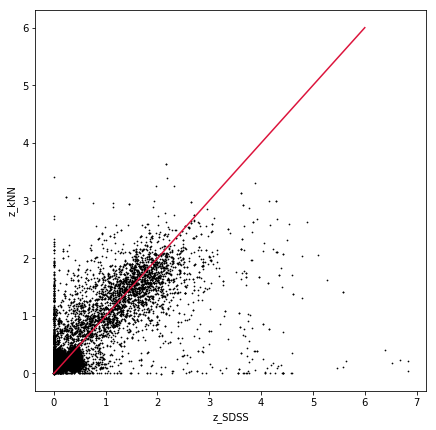

In [91]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y, y_preds, c='k', s=0.5)
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlabel('z_SDSS')
ax.set_ylabel('z_kNN');

## Random forest (out of the box)

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

y_preds = cross_val_predict(rf, X, y, cv=10)


/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/anaconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/a

In [93]:
print('The RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y,y_preds))))
print('{:.2f} are catastrophic'.format(catastrophic_fraction(y, y_preds)))

The RMSE = 0.21
0.36 are catastrophic


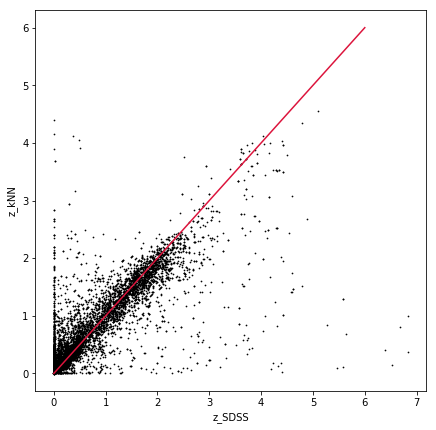

In [94]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y, y_preds, c='k', s=0.5)
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlabel('z_SDSS')
ax.set_ylabel('z_kNN');

# Save out somewhat cleaned version

In [96]:
# sdss.to_csv(f'sdss-cleaned.csv', index_label=True)